# Mars Weather Project
---
## Project objectives
* Download HTML data from the Curiosity Rover website using Seleniumn and Chromedriver
* Store HTML weather table data in Pandas DataFrame
* Plot the data using matplotlib
* Get the latest photo from the NASA Perseverance API and display with Skimage
---
## Requirements
* Windows 10 (Chrome driver uses Windows version)
* Visual Studio Code + Jupyter Notebook and Python extensions 
* Python (latest version)
* Chrome (version 89)
### This is the table we are trying to scrape. 
![WeatherTable](MarsCuriosityRoverWeather.jpg)



In [68]:
#install all required packages
!pip install -r "requirements.txt" 

^C


In [31]:
#packages needed for getting/plotting data
import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt
%matplotlib inline  

#packages needed for getting/displaying image
import requests 
from skimage import io
from skimage.io import imread, imshow
from skimage.viewer import ImageViewer
import json 




C:\Users\carol\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.4) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


# Getting the data from the Curiosity Rover

In [4]:
#run separate Python file to get HTML weather data
try:
    %run -i "getData.py" 
    print("successfully updated Mars weather data")
except:
    print("warning: could not update Mars weather data")

file was written
successfully updated Mars weather data


In [72]:
#select weather table from html file using Pandas
html = pd.read_html("mars_weather.html", attrs={'id': 'weather_observation'}) 
htmlTable = html[0] #access new DataFrame object
htmlTable


Date                Sol Air Temperature (°F | °C)          \
  Unnamed: 0_level_1 Unnamed: 1_level_1                      Max.    Min.   
0       Apr. 7, 2021               3082                       9°F  -105°F   
1       Apr. 6, 2021               3081                       3°F  -105°F   
2       Apr. 5, 2021               3080                      -2°F  -105°F   
3       Apr. 4, 2021               3079                      10°F  -101°F   
4       Apr. 3, 2021               3078                      12°F   -99°F   
5       Apr. 2, 2021               3077                      10°F  -101°F   
6       Apr. 1, 2021               3076                      10°F   -99°F   

       Pressure (Pa)            Sunrise             Sunset  
  Unnamed: 4_level_1 Unnamed: 5_level_1 Unnamed: 6_level_1  
0                850              06:25              18:17  
1                850              06:25              18:17  
2                850              06:25              18:18  
3                849              06:26              18:18  
4                849              06:26              18:18  
5                848              06:26              18:19  
6                847              06:26              18:19

In [73]:
htmlTable.columns = htmlTable.columns.droplevel(1) #get rid of multi-level column headings
htmlTable

,Date,Sol,Air Temperature (°F | °C),Air Temperature (°F | °C),Pressure (Pa),Sunrise,Sunset
0,"Apr. 7, 2021",3082,9°F,-105°F,850,06:25,18:17
1,"Apr. 6, 2021",3081,3°F,-105°F,850,06:25,18:17
2,"Apr. 5, 2021",3080,-2°F,-105°F,850,06:25,18:18
3,"Apr. 4, 2021",3079,10°F,-101°F,849,06:26,18:18
4,"Apr. 3, 2021",3078,12°F,-99°F,849,06:26,18:18
5,"Apr. 2, 2021",3077,10°F,-101°F,848,06:26,18:19
6,"Apr. 1, 2021",3076,10°F,-99°F,847,06:26,18:19


In [74]:
htmlTable.columns = ['Date', 'Sol', 'MaxTemp', 'MinTemp', 'Pressure', 'Sunrise', 'Sunset'] #rename column headings
htmlTable

,Date,Sol,MaxTemp,MinTemp,Pressure,Sunrise,Sunset
0,"Apr. 7, 2021",3082,9°F,-105°F,850,06:25,18:17
1,"Apr. 6, 2021",3081,3°F,-105°F,850,06:25,18:17
2,"Apr. 5, 2021",3080,-2°F,-105°F,850,06:25,18:18
3,"Apr. 4, 2021",3079,10°F,-101°F,849,06:26,18:18
4,"Apr. 3, 2021",3078,12°F,-99°F,849,06:26,18:18
5,"Apr. 2, 2021",3077,10°F,-101°F,848,06:26,18:19
6,"Apr. 1, 2021",3076,10°F,-99°F,847,06:26,18:19


In [75]:
# remove temperature formatting using regex
htmlTable.MaxTemp.replace('°.*', '', regex = True, inplace = True) #inplace permanently changes the DataFrame object
htmlTable.MinTemp.replace('°.*', '', regex = True, inplace = True)
htmlTable

,Date,Sol,MaxTemp,MinTemp,Pressure,Sunrise,Sunset
0,"Apr. 7, 2021",3082,9,-105,850,06:25,18:17
1,"Apr. 6, 2021",3081,3,-105,850,06:25,18:17
2,"Apr. 5, 2021",3080,-2,-105,850,06:25,18:18
3,"Apr. 4, 2021",3079,10,-101,849,06:26,18:18
4,"Apr. 3, 2021",3078,12,-99,849,06:26,18:18
5,"Apr. 2, 2021",3077,10,-101,848,06:26,18:19
6,"Apr. 1, 2021",3076,10,-99,847,06:26,18:19


In [76]:
#check data types before plotting
htmlTable.info(verbose=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      7 non-null      object
 1   Sol       7 non-null      int64 
 2   MaxTemp   7 non-null      object
 3   MinTemp   7 non-null      object
 4   Pressure  7 non-null      int64 
 5   Sunrise   7 non-null      object
 6   Sunset    7 non-null      object
dtypes: int64(2), object(5)
memory usage: 520.0+ bytes


In [77]:
htmlTable['MaxTemp'] = pd.to_numeric(htmlTable['MaxTemp']) #convert to integer
htmlTable['MinTemp'] = pd.to_numeric(htmlTable['MinTemp'])
htmlTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      7 non-null      object
 1   Sol       7 non-null      int64 
 2   MaxTemp   7 non-null      int64 
 3   MinTemp   7 non-null      int64 
 4   Pressure  7 non-null      int64 
 5   Sunrise   7 non-null      object
 6   Sunset    7 non-null      object
dtypes: int64(4), object(3)
memory usage: 520.0+ bytes


In [78]:
#drop columns that will not be plotted
htmlTable.drop(['Date'], axis=1, inplace = True)
htmlTable.drop(['Pressure'], axis=1, inplace = True)
htmlTable.drop(['Sunrise'], axis=1, inplace = True)
htmlTable.drop(['Sunset'], axis=1, inplace = True)
htmlTable

,Sol,MaxTemp,MinTemp
0,3082,9,-105
1,3081,3,-105
2,3080,-2,-105
3,3079,10,-101
4,3078,12,-99
5,3077,10,-101
6,3076,10,-99


# Plotting the data

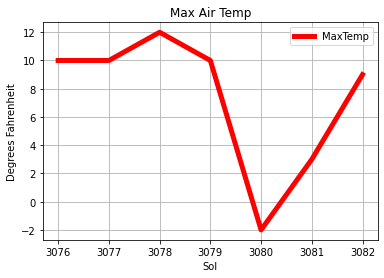

In [19]:
maxTempGraph = htmlTable.plot(title='Max Air Temp', x = 'Sol', y = 'MaxTemp', grid=True, linewidth=5, color='r', ylabel = "Degrees Fahrenheit")

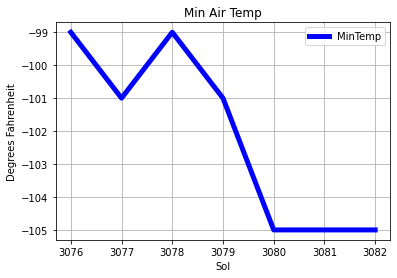

In [20]:
minTempGraph = htmlTable.plot(title='Min Air Temp', x = 'Sol', y = 'MinTemp', grid=True, linewidth=5, color='b', ylabel = 'Degrees Fahrenheit')

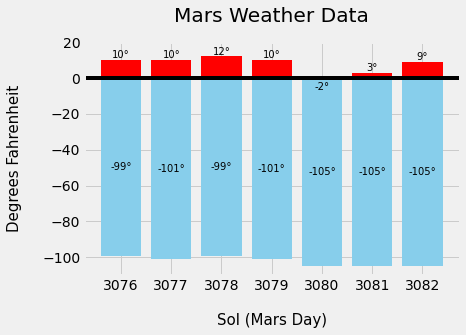

In [23]:
#create stacked bar graph to display min and max temps
x = htmlTable.Sol
y1 = htmlTable.MinTemp
y2 = htmlTable.MaxTemp
width = .5 #width of the bars
plt.style.use('fivethirtyeight') #use built-in style from matplotlib
maxPlot = plt.bar(x, y2, color = 'red')
minPlot = plt.bar(x, y1, color = 'skyblue')
plt.ylim([-110, 20]) #set the y-axis limits
plt.axhline(0, color = 'black') #create line at 0
plt.xlabel('Sol (Mars Day)', labelpad = 20, fontsize = 15)
plt.ylabel('Degrees Fahrenheit', labelpad = 20, fontsize = 15)
plt.title('Mars Weather Data', pad = 20)
plt.bar_label(maxPlot, label_type='edge', fmt='%g°', fontsize=10) #add labels to the bars 
plt.bar_label(minPlot, label_type='center', fmt='%g°', fontsize=10)
plt.show()

# Get latest photo from Perseverance Rover (MCZ_LEFT camera)

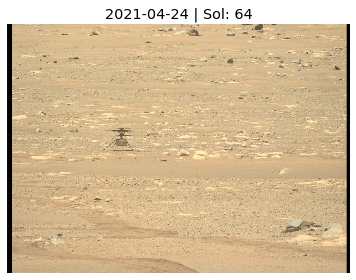

In [79]:
perseverancePhotoAPI = 'https://api.nasa.gov/mars-photos/api/v1/rovers/perseverance/latest_photos'
params = {'camera': 'MCZ_LEFT', 'api_key': "DEMO_KEY"} #specify which camera
getPhotos = requests.get(perseverancePhotoAPI, params = params) #use requests library to get access to Perseverance API
loadPhoto = json.loads(getPhotos.text) #load json text into variable

photos = pd.DataFrame(loadPhoto['latest_photos'][0]) #load latest photo into DataFrame
display = photos['img_src'] #access image link from DataFrame

image = io.imread(display.id) #use Skimage to read image

earth_date = loadPhoto['latest_photos'][0]['earth_date'] 
sol = loadPhoto['latest_photos'][0]['sol']
strSol = str(sol)

plt.subplot() #create plot to display photo
imshow(image) #display image onto plot
plt.title(earth_date + ' | Sol: ' + strSol)
plt.axis('off') #turn off grid lines
plt.show() #show plot
